![insomnia](insomnia.jpg)


# SleepInc: Helping you find better sleep 😴

## 📖 Background

Your client is SleepInc, a sleep health company that recently launched a sleep-tracking app called SleepScope. The app monitors sleep patterns and collects users' self-reported data on lifestyle habits. SleepInc wants to identify lifestyle, health, and demographic factors that strongly correlate with poor sleep quality. They need your help to produce visualizations and a summary of findings for their next board meeting! They need these to be easily digestible for a non-technical audience!

## 💾 The data

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

***Acknowledgments**: Laksika Tharmalingam, Kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset* (this is a fictitious dataset)

# Step 1: Loading the Dataset

In [40]:
import pandas as pd
sleep_data = pd.read_csv('sleep_health_data.csv')
sleep_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## 💪 Challenge

Leverage this sleep data to analyze the relationship between lifestyle, health, demographic factors, and sleep quality. Your goal is to identify factors that correlate with poor sleep health.

Some examples:

- Examine relationships between several factors like gender, occupation, physical activity, stress levels, and sleep quality/duration. Create visualizations to present your findings.
- Produce recommendations on ways people can improve sleep health based on the patterns in the data.
- Develop an accessible summary of study findings and recommendations for improving sleep health for non-technical audiences.

# Step 2: Checking for Missing Values and Duplicates
- This code checks for missing values in each column and counts duplicate entries based on the 'Person ID'.

In [42]:
# Checking for missing values
missing_values = sleep_data.isnull().sum()

# Checking for duplicates based on Person ID
duplicate_entries = sleep_data.duplicated(subset='Person ID').sum()

Step 3: Exploratory Data Analysis - Visualizations
- This block of code uses matplotlib and seaborn for visualizing different aspects of the dataset, such as the distribution of age, sleep duration, gender, BMI category, quality of sleep, and stress level.

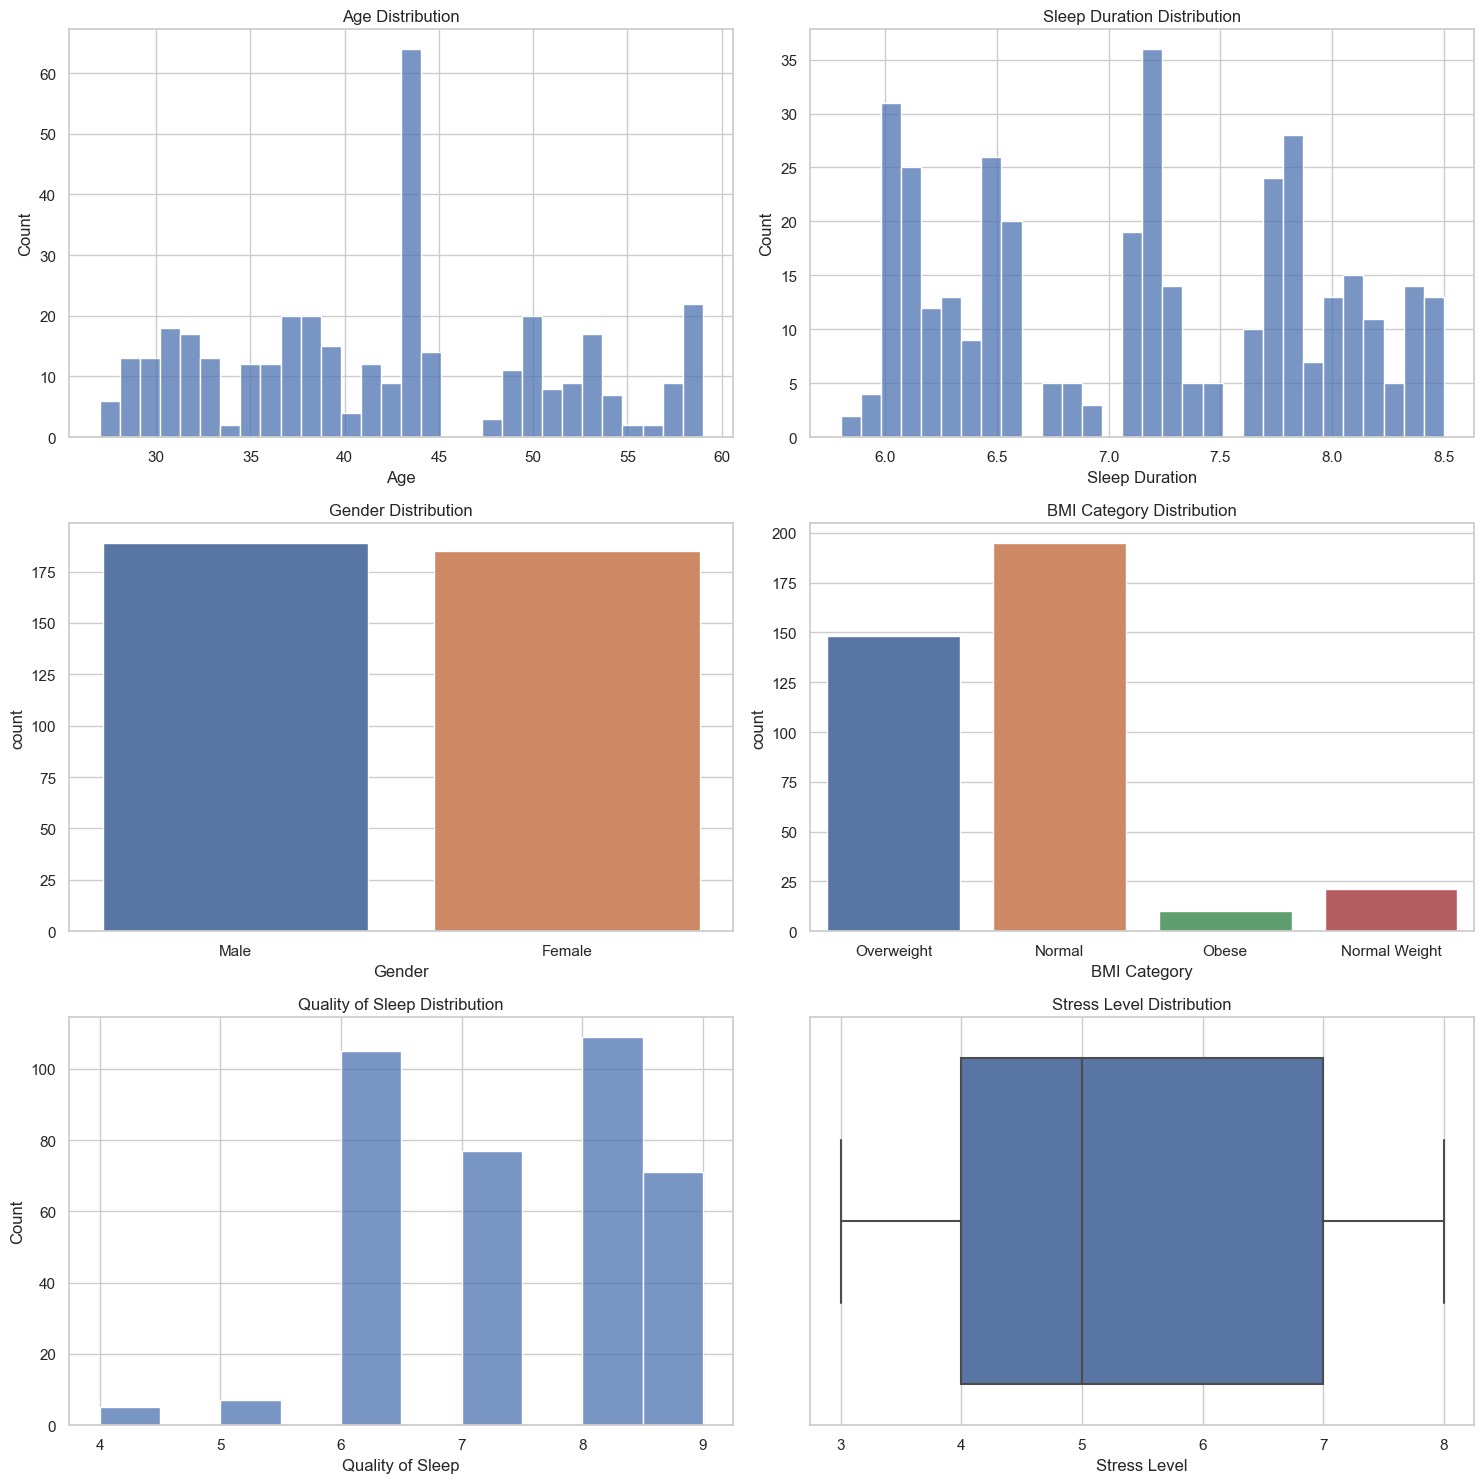

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating subplots for different variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Histogram of Age
sns.histplot(sleep_data['Age'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Histogram of Sleep Duration
sns.histplot(sleep_data['Sleep Duration'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Sleep Duration Distribution')

# Count plot of Gender
sns.countplot(x='Gender', data=sleep_data, ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

# Count plot of BMI Category
sns.countplot(x='BMI Category', data=sleep_data, ax=axes[1, 1])
axes[1, 1].set_title('BMI Category Distribution')

# Histogram of Quality of Sleep
sns.histplot(sleep_data['Quality of Sleep'], bins=10, ax=axes[2, 0])
axes[2, 0].set_title('Quality of Sleep Distribution')

# Boxplot for Stress Level
sns.boxplot(x='Stress Level', data=sleep_data, ax=axes[2, 1])
axes[2, 1].set_title('Stress Level Distribution')

plt.tight_layout()
plt.show()

# Step 4: Correlation Analysis and Further Visualizations

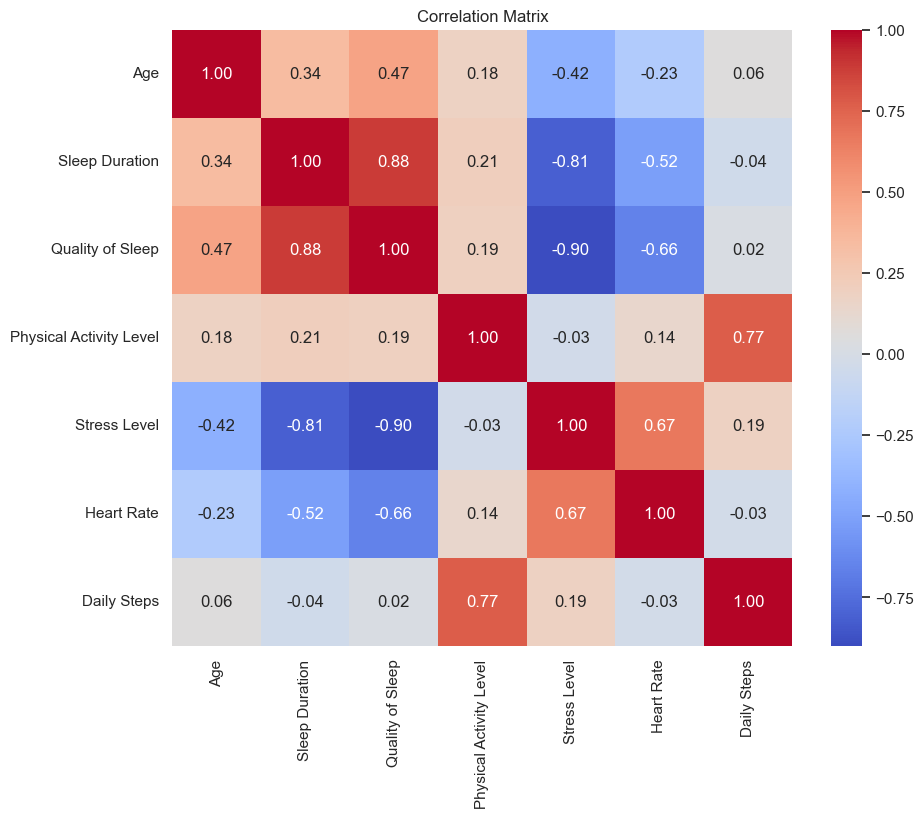

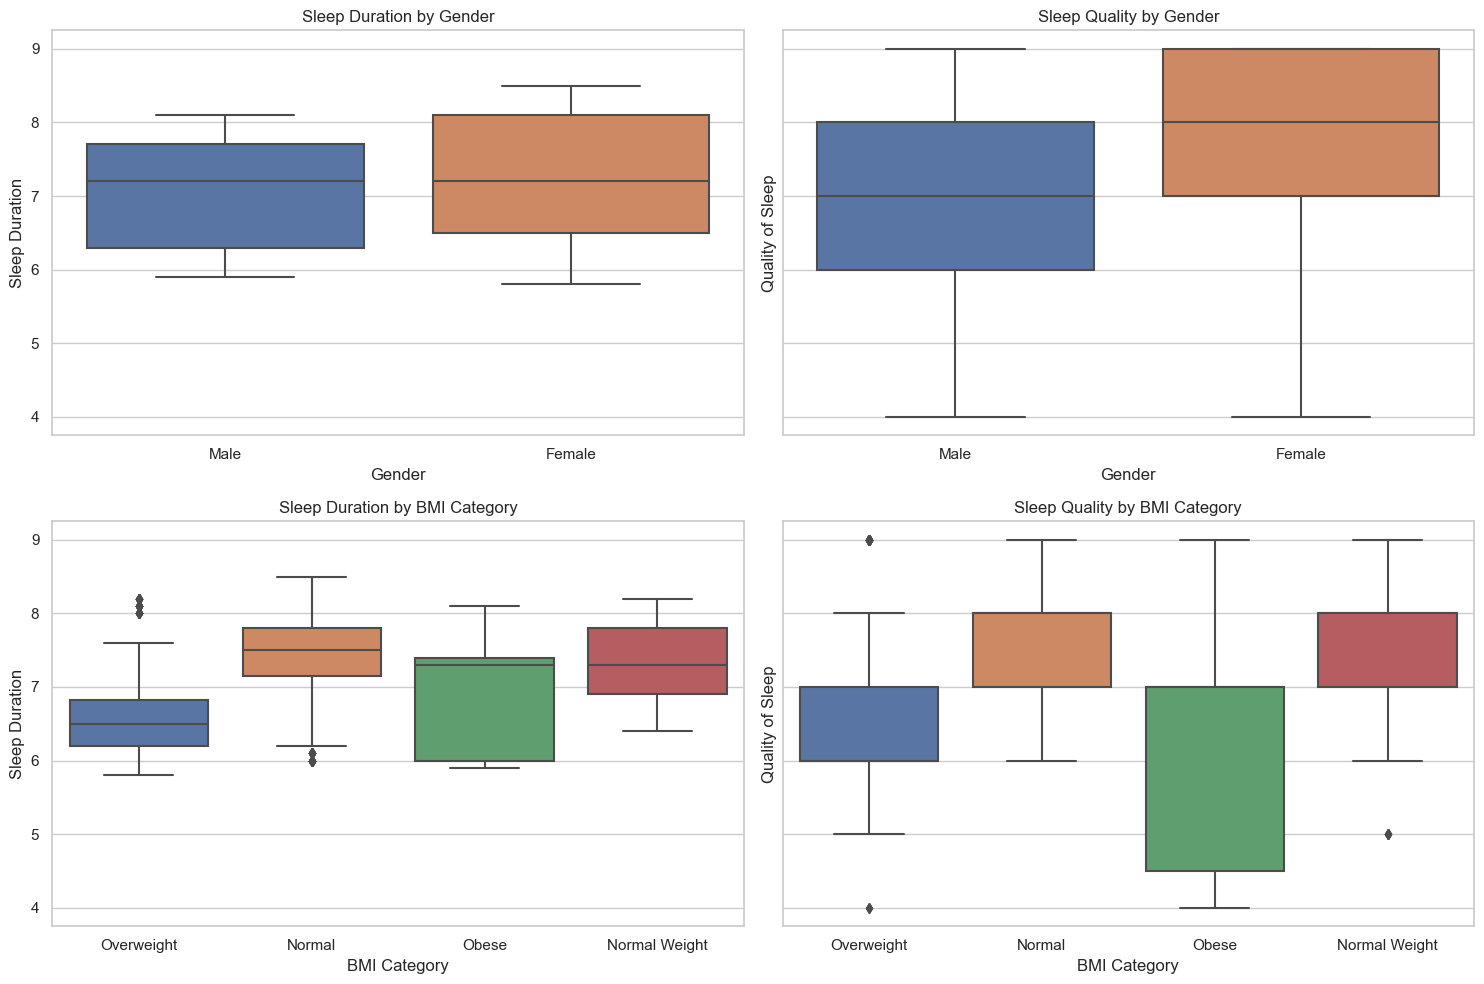

In [44]:
# Correlation matrix focusing on sleep health indicators and lifestyle factors
correlation_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                       'Stress Level', 'Heart Rate', 'Daily Steps']
correlation_matrix = sleep_data[correlation_columns].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Additionally, examining sleep duration and quality by Gender and BMI category
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)

# Sleep Duration by Gender
sns.boxplot(x='Gender', y='Sleep Duration', data=sleep_data, ax=axes[0, 0])
axes[0, 0].set_title('Sleep Duration by Gender')

# Sleep Quality by Gender
sns.boxplot(x='Gender', y='Quality of Sleep', data=sleep_data, ax=axes[0, 1])
axes[0, 1].set_title('Sleep Quality by Gender')

# Sleep Duration by BMI Category
sns.boxplot(x='BMI Category', y='Sleep Duration', data=sleep_data, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Duration by BMI Category')

# Sleep Quality by BMI Category
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=sleep_data, ax=axes[1, 1])
axes[1, 1].set_title('Sleep Quality by BMI Category')

plt.tight_layout()
plt.show()

# Recommendations Based on Findings
- Manage Stress: As stress negatively impacts sleep quality, stress management techniques like mindfulness, meditation, or counseling could be beneficial.
- Increase Physical Activity: Engaging in regular physical activity can improve sleep quality. This doesn't necessarily mean intense workouts; even daily walking or moderate exercise can help.
- BMI Management: Those in the 'Obese' BMI category tend to have poorer sleep quality. Weight management through diet and exercise could improve sleep health.
- Gender-Specific Approaches: While differences based on gender are not stark, it might be worth exploring if any gender-specific factors (e.g., hormonal differences) influence sleep quality.

# Summary for Non-Technical Audiences
Stress is a Sleep Disruptor: High stress can make your sleep worse. Finding ways to relax and manage stress can lead to better sleep.
Move More, Sleep Better: Regular exercise or even just daily walking can improve how well you sleep.
Weight Matters: Being overweight can affect your sleep. A balanced diet and regular exercise can help improve sleep quality.
Everyone's Different: While everyone's sleep needs are unique, paying attention to your stress levels, physical activity, and weight can generally help improve your sleep.